In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import random

# Any results you write to the current directory are saved as output.
df = pd.read_csv('/kaggle/input/recursion-cellular-image-classification-224-jpg/new_train.csv')
exps = df['experiment'].unique()
exps = [exp.split('-')[0] for exp in exps]
exp_series = pd.Series(exps)
cell_lines = exp_series.unique()
print('four cell lines are: ', cell_lines)

four cell lines are:  ['HEPG2' 'HUVEC' 'RPE' 'U2OS']


/tmp/ipykernel_28/1573830337.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['cell_line'], _ = df['experiment'].str.split('-').str
/tmp/ipykernel_28/1573830337.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = sub_df[df['sirna'] == sirna]


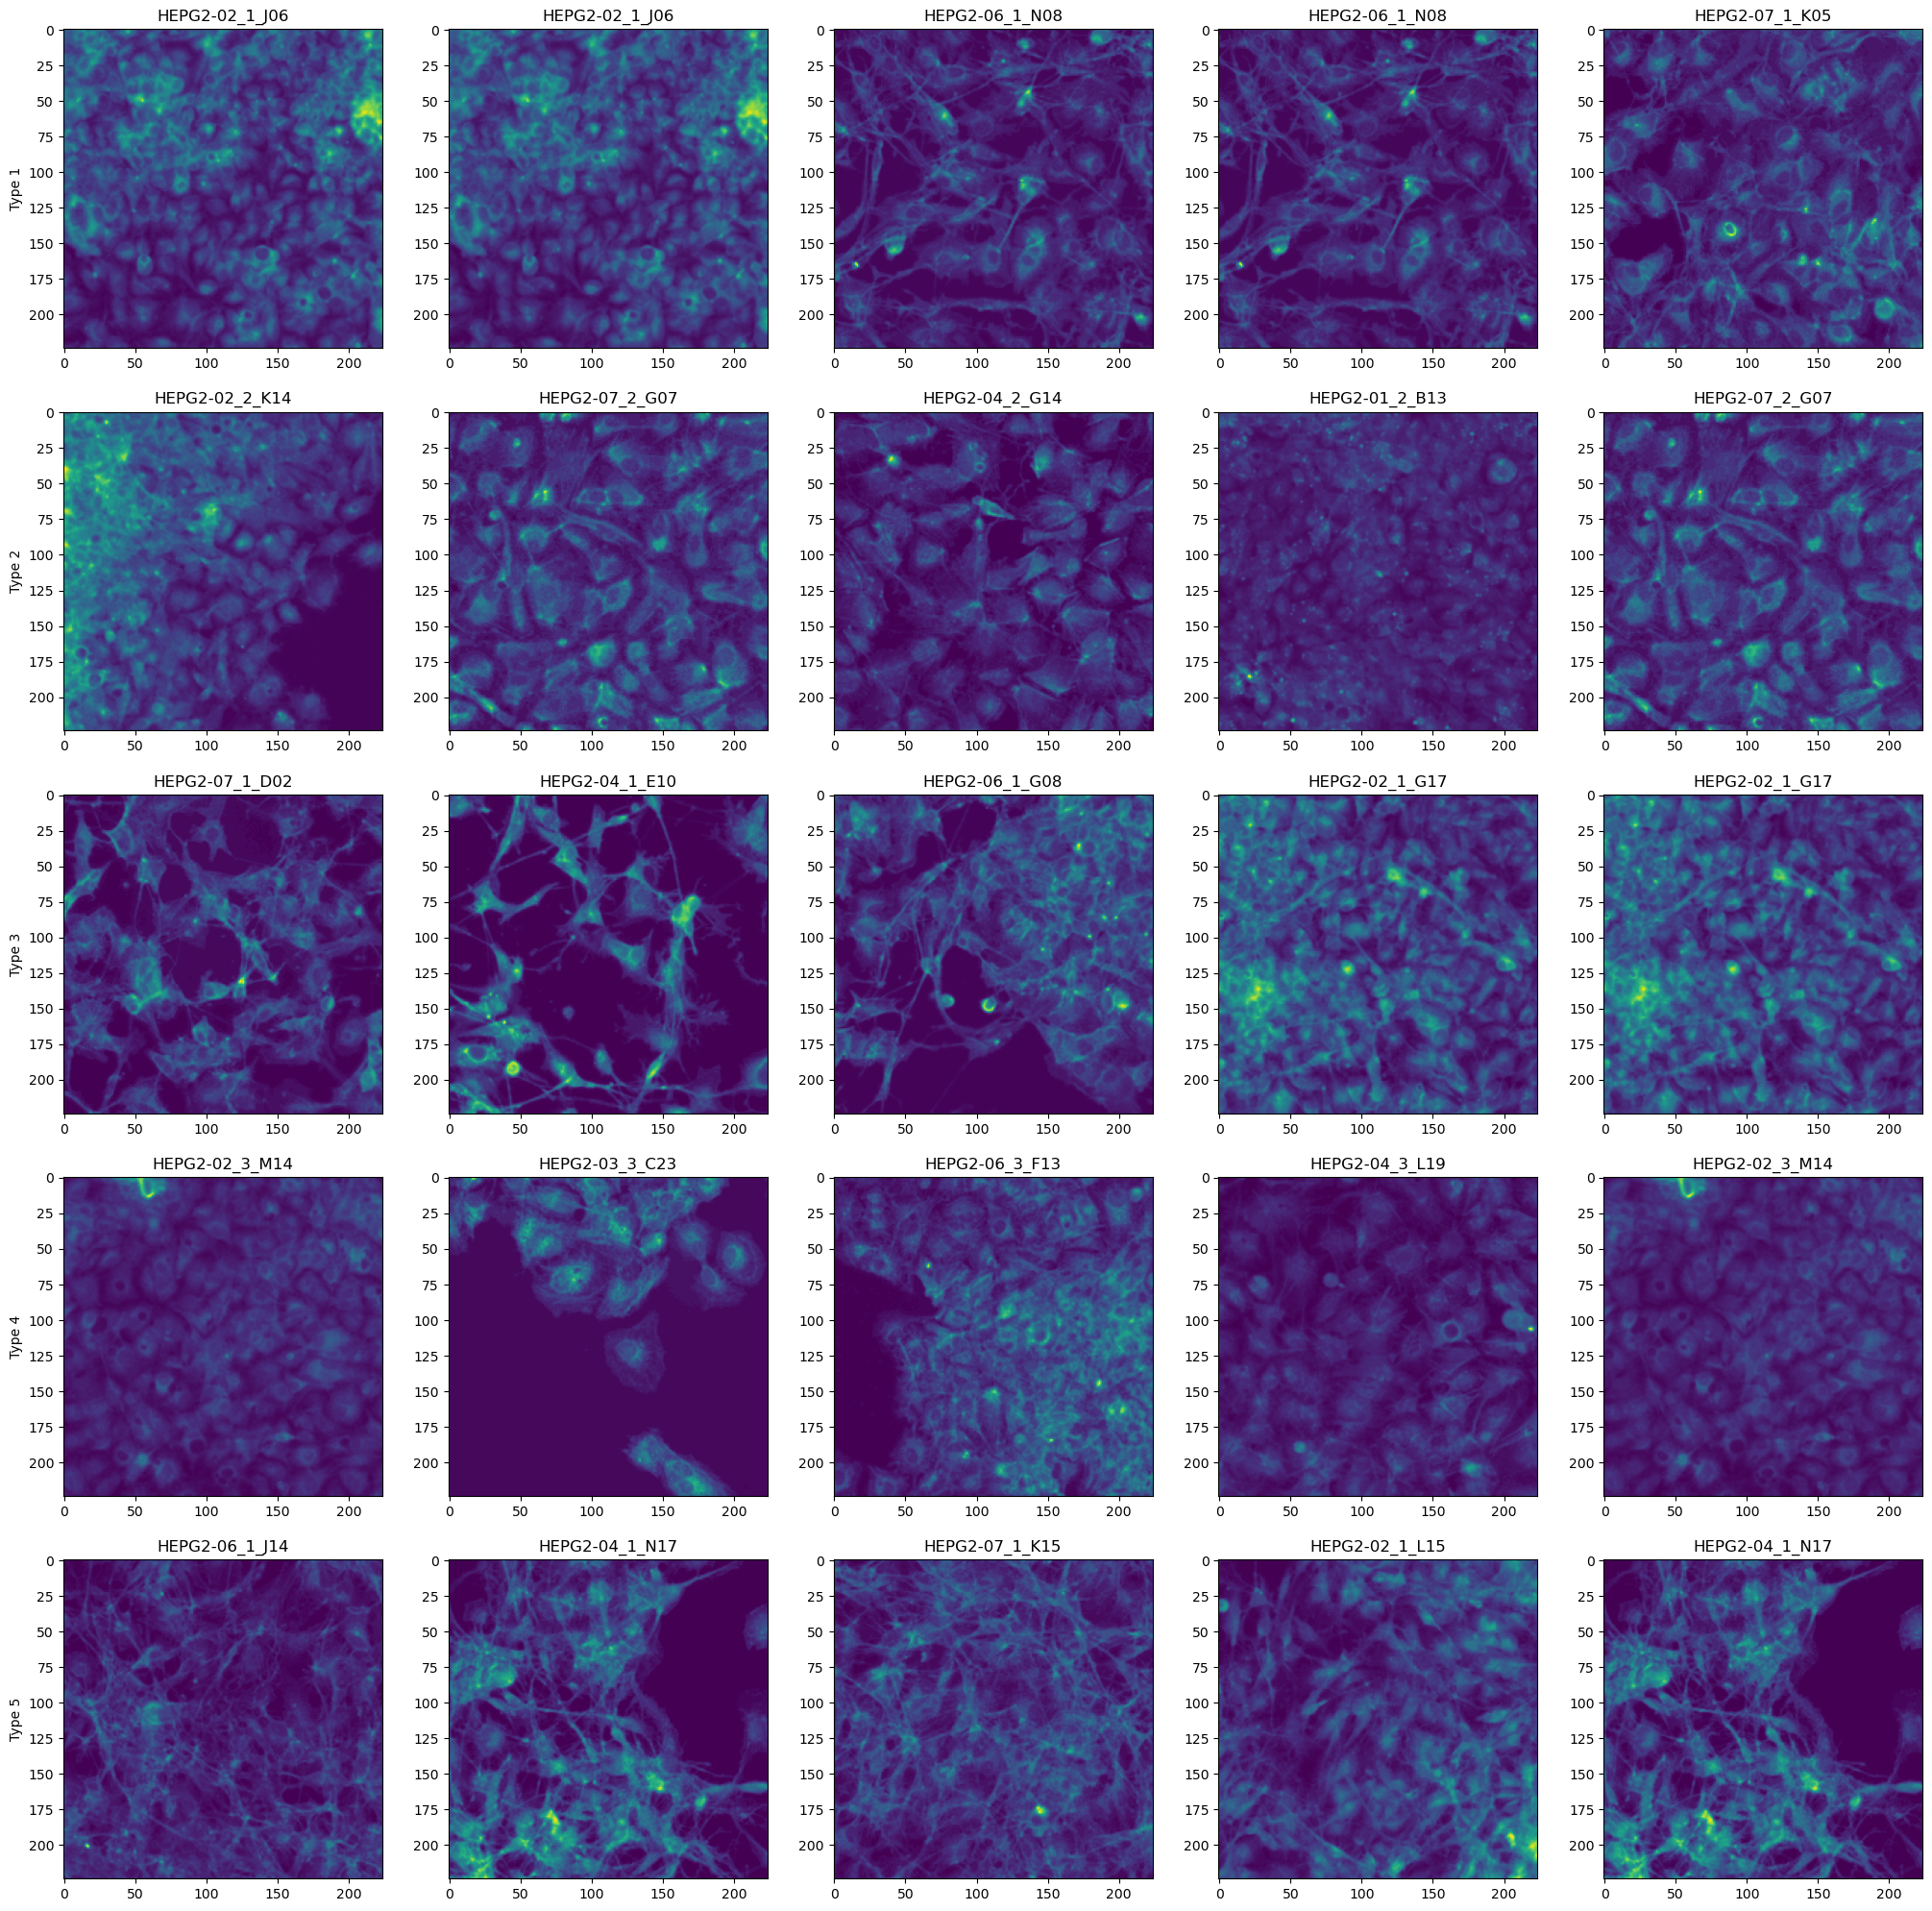

In [19]:
df = pd.read_csv('/kaggle/input/recursion-cellular-image-classification-224-jpg/new_train.csv')
df['cell_line'], _ = df['experiment'].str.split('-').str
types_select = [1,2,3,4,5]
fig, axes = plt.subplots(figsize=(25, 25), nrows=len(types_select), ncols=5)
for i, sirna in enumerate(types_select):
    sub_df = df[df['cell_line'] == 'HEPG2']
    sub_df = sub_df[df['sirna'] == sirna]
    sub_df_records = sub_df.to_records()
    np.random.shuffle(sub_df_records)
    

    axes[i][0].set_ylabel('Type ' + str(sirna))
    for j in range(5):
        exp = sub_df_records[j]['experiment']
        plate = sub_df_records[j]['plate']
        well = sub_df_records[j]['well']
        path = os.path.join('/kaggle/input/recursion-cellular-image-classification/train', exp, 'Plate' + str(plate), well + '_' + 's2' + '_' + 'w3' + '.png')
        img = Image.open(path)
        img = transforms.Resize(224)(img)
        axes[i][j].imshow(img)
        axes[i][j].set_title(sub_df_records[j]['id_code'])

In [14]:
print(len(sub_df_records))

0


In [15]:
print(df['sirna'].unique())


['sirna_250' 'sirna_62' 'sirna_1115' ... 'sirna_926' 'sirna_229'
 'sirna_1040']


In [21]:
df = pd.read_csv('/kaggle/input/recursion-cellular-image-classification-224-jpg/new_train.csv')
incomplete_list = []
df['cell_line'], _ = df['experiment'].str.split('-').str
cell_types = ['HEPG2', 'HUVEC', 'RPE', 'U2OS']
for i in range(1, max(df['sirna']) + 1):
    sub_df = df[df['sirna'] == i]
    if (len(df['cell_line'].unique()) < 4):
        incomplete_list.append(i)
print('the incomplete list is: ', incomplete_list)

/tmp/ipykernel_28/1991717689.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['cell_line'], _ = df['experiment'].str.split('-').str


the incomplete list is:  []


**Histgram of different cell types over sirans**

/tmp/ipykernel_28/3147521349.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['cell_line'], _ = df['experiment'].str.split('-').str


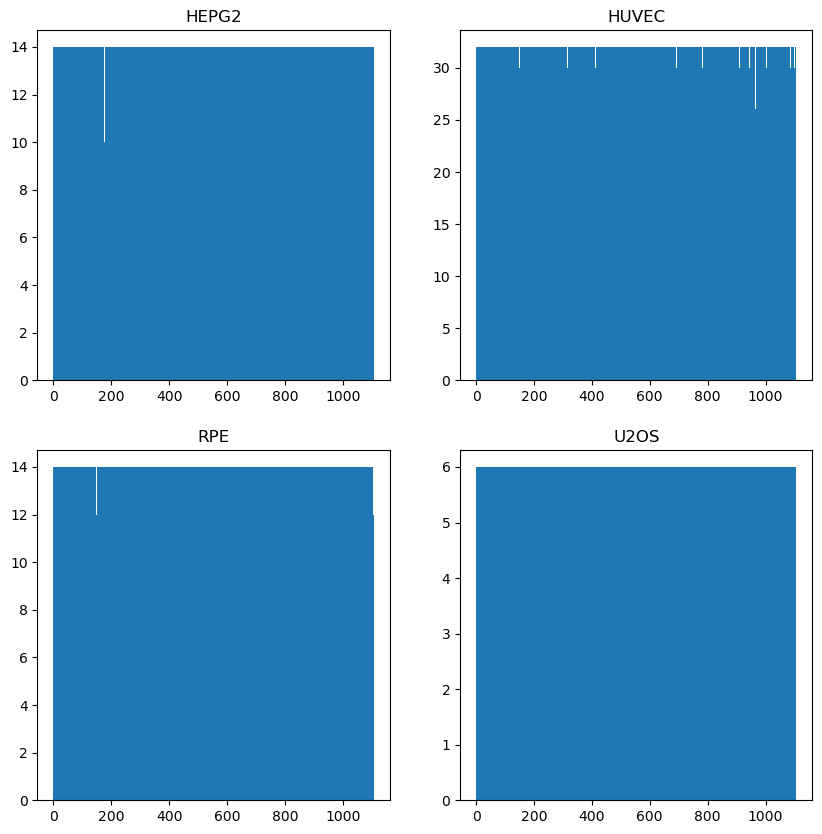

In [22]:
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/recursion-cellular-image-classification-224-jpg/new_train.csv')
incomplete_list = []
df['cell_line'], _ = df['experiment'].str.split('-').str
cell_types = ['HEPG2', 'HUVEC', 'RPE', 'U2OS']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, cell_type in enumerate(cell_types):
    sub_df = df[df['cell_line'] == cell_type]
    axes[i // 2, i % 2].hist(sub_df['sirna'].tolist(), bins=1108)
    axes[i // 2, i % 2].set_title(cell_type)